# 2022 Running Analysis


In [8]:
from stravadataanalysis.src.repository import data_loader

activities_2022 = data_loader.load_activities("../data/2022/activities")
runs = activities_2022[activities_2022['type'] == 'Run']


## 2022 Highlight

In [9]:
from stravadataanalysis.src.view import data_format

runs_2022 =runs[['id', 'start_date', 'name', 'distance', 'elapsed_time', 'average_speed', 'total_elevation_gain']]\
  .sort_values('distance', ascending=False)
runs_2022['distance_overview'] = runs_2022['distance'].apply(data_format.m_as_km)
runs_2022['elapsed_time_overview'] = runs_2022['elapsed_time'].apply(data_format.seconds_as_hhmmss)
runs_2022['average_speed_overview'] = runs_2022['average_speed'].apply(data_format.mps_as_minpkm)
runs_2022['total_elevation_gain_overview'] = runs_2022['total_elevation_gain'].apply(data_format.m)
display(runs_2022[['name', 'distance_overview', 'elapsed_time_overview', 'average_speed_overview', 'total_elevation_gain_overview', 'start_date']])


,name,distance_overview,elapsed_time_overview,average_speed_overview,total_elevation_gain_overview,start_date
15,Course à pied l'après-midi,21.34km,01:50:38,5:10min/km,121m,2022-03-13T15:21:44Z
54,Foulées du Numérique 2022,19.25km,01:33:47,4:52min/km,13m,2022-09-18T07:48:00Z
22,Henvic / Sentier Côtier à Carantec,18.89km,01:45:04,5:32min/km,263m,2022-04-17T15:00:17Z
62,Course à pied dans l'après-midi,16.66km,01:25:26,5:08min/km,50m,2022-11-05T15:08:22Z
34,Course à pied le matin,15.6km,01:24:23,5:23min/km,21m,2022-06-05T08:04:29Z
...,...,...,...,...,...,...
38,Course à pied le midi,10.0km,00:52:20,5:14min/km,53m,2022-07-04T10:00:21Z
45,Course à pied en soirée,10.0km,00:53:50,5:22min/km,133m,2022-07-27T16:33:24Z
71,Course à pied le matin,8.72km,00:42:59,4:56min/km,34m,2022-12-04T08:00:18Z
52,Course à pied dans l'après-midi,8.62km,00:44:59,5:13min/km,0m,2022-09-04T15:39:12Z


In [10]:
from stravadataanalysis.src.view import data_format
from stravadataanalysis.src.domain import highlights
import pandas as pd

highlights_requests = [
    highlights.Highlight('max_distance', 'distance', display_function=data_format.m_as_km),
    highlights.Highlight('max_duration', 'elapsed_time', display_function=lambda x: data_format.seconds_as_hhmmss(int(x))),
    highlights.Highlight('max_elevation_gain', 'total_elevation_gain', display_function=data_format.m),
    highlights.Highlight('earlier_run', 'start_time', ascending_sort_order=True),
    highlights.Highlight('max_average_speed', 'average_speed', data_format.mps_as_minpkm),
    highlights.Highlight('max_top_heartrate', 'max_heartrate', data_format.bpm),
]

columns = ["highlight", "value", "name", "start_date_local", "id"]

highlights_2022 = []
for highlight_request in highlights_requests:
    highlight = highlight_request.transform(runs)
    highlights_2022.append(highlight)

pd.DataFrame(highlights_2022, columns=columns)

,highlight,value,name,start_date_local,id
15,max_distance,21.34km,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
15,max_duration,01:50:38,Course à pied l'après-midi,2022-03-13T16:21:44Z,6819196468
22,max_elevation_gain,263m,Henvic / Sentier Côtier à Carantec,2022-04-17T17:00:17Z,6997761739
40,earlier_run,06:51:23,Course à pied le matin,2022-07-12T06:51:23Z,7454700738
68,max_average_speed,4:41min/km,Course à pied dans l'après-midi,2022-11-27T16:30:12Z,8177401446
63,max_top_heartrate,204bpm,Côtes à Chantenay,2022-11-10T12:10:37Z,8096506459


# Distance run

0      7000
1      8000
2     10000
3     11000
4     12000
5     13000
6     14000
7     15000
8     16000
9     18000
10    19000
11    21000
Name: distance, dtype: int64
<class 'pandas.core.series.Series'>
int64


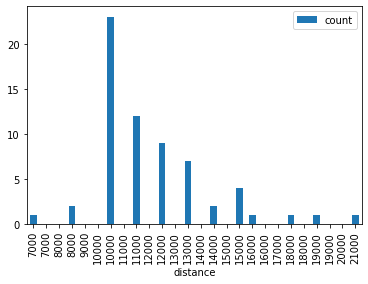

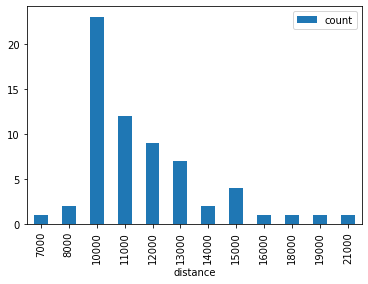

In [11]:
from stravadataanalysis.src.domain.distances import get_distance_distribution
from stravadataanalysis.src.view.plot import plot_distance_distribution

distance_distribution = get_distance_distribution(runs, 1000)

plot_distance_distribution(distance_distribution, True)
plot_distance_distribution(distance_distribution, False)

## Segments
Top 10 segments of the year :

,id,count,name
98,20310261,30,passage à côté du stade jusqu'au terrain de te...
45,13276220,17,Retour depuis pont
95,20263817,15,vers aire de jeu du parc de la Chézine
6,5403095,15,1km Chezine
93,20263702,14,Chézine partie sud du circuit principal
88,19642112,13,chez moi
109,22650322,13,Bassin de la Chezine --> 2ème pont
16,6899362,13,Montée de l'Avenue des Acacias
97,20310176,12,La Gourmette vers bout du lac
8,5472005,12,Dervallieres-Desgrées du lou


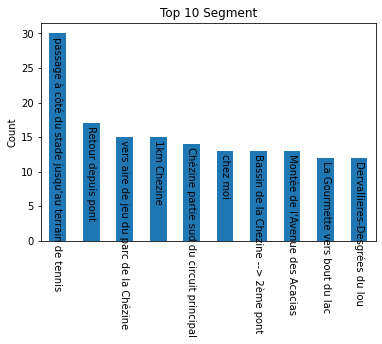

In [5]:
from stravadataanalysis.src.domain import segments
from stravadataanalysis.src.view import plot

top_10_segments = segments.get_top_10_segments(runs)

display(top_10_segments)

plot.plot_top_segments_bar(top_10_segments)


## Split metrics

Evolution of some metrics during my runs :
* speed
* heart rate

> NOTE: Training runs (Strava's workout_type 3) are excluded from the analysis because split runs create split metrics with various interval and the goal is to compare each km.

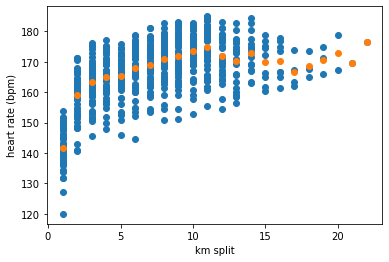

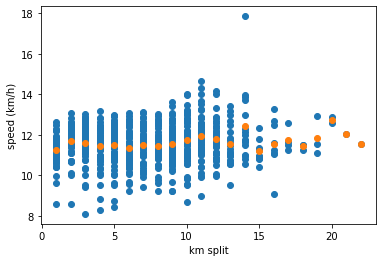

In [6]:
from stravadataanalysis.src.domain import split_metrics
from stravadataanalysis.src.view import plot

runs_activities = runs[runs['workout_type'] != 3].reset_index()
metrics = split_metrics.extract_split_metrics(runs_activities)

plot.plot_split_metric_heartrate(metrics['value'], metrics['means'])
plot.plot_split_metric_speed(metrics['value'], metrics['means'])